In [68]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.graph_objects as go  

In [69]:
api_key = 'd9e1b91ef550d751302df0e2a7bd5685'

fred = Fred(api_key=api_key)
plt.style.use('fivethirtyeight')

In [70]:
# search for Brazil exports data
br_results = fred.search("Brazil exports")
br_results = br_results.loc[br_results['title'].str.contains("Value of Exports to Brazil from ")]

In [71]:
# get a list of state names
state_names = br_results['title'].str.replace("Value of Exports to Brazil from ", "", regex=False).to_list()


In [72]:
# go through each result and get the series data
all_results = []

for i, id in enumerate(br_results.index):
    result = fred.get_series(id)
    result = result.to_frame(name=state_names[i])
    all_results.append(result)

In [73]:
# concatenate all results into a single df
exports = pd.concat(all_results, axis=1)

# drop rows where all values are NaN
exports = exports.dropna(how='all').fillna(0)

In [74]:
px.line(exports)

In [75]:
# index by year
exports.index = exports.index.year

In [76]:
# melhorar legibilidade dos valores
def format_monetary(x):
    if x >= 1e9:
        return f"${x/1e9:.2f}B"
    elif x >= 1e6:
        return f"${x/1e6:.2f}M"
    else:
        return f"${x:.2f}"

In [77]:
# identificar os estados que aparecem pelo menos uma vez no top 5 de qualquer ano
top5_states = set()
for _, row in exports.iterrows():
    top5_states.update(row.nlargest(5).index)
    
# dicionário com uma cor para cada estado
colors = plt.cm.get_cmap('tab20', len(top5_states)) 
state_colors = {state: colors(i) for i, state in enumerate(top5_states)}

C:\Users\User\AppData\Local\Temp\ipykernel_6868\2795949771.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



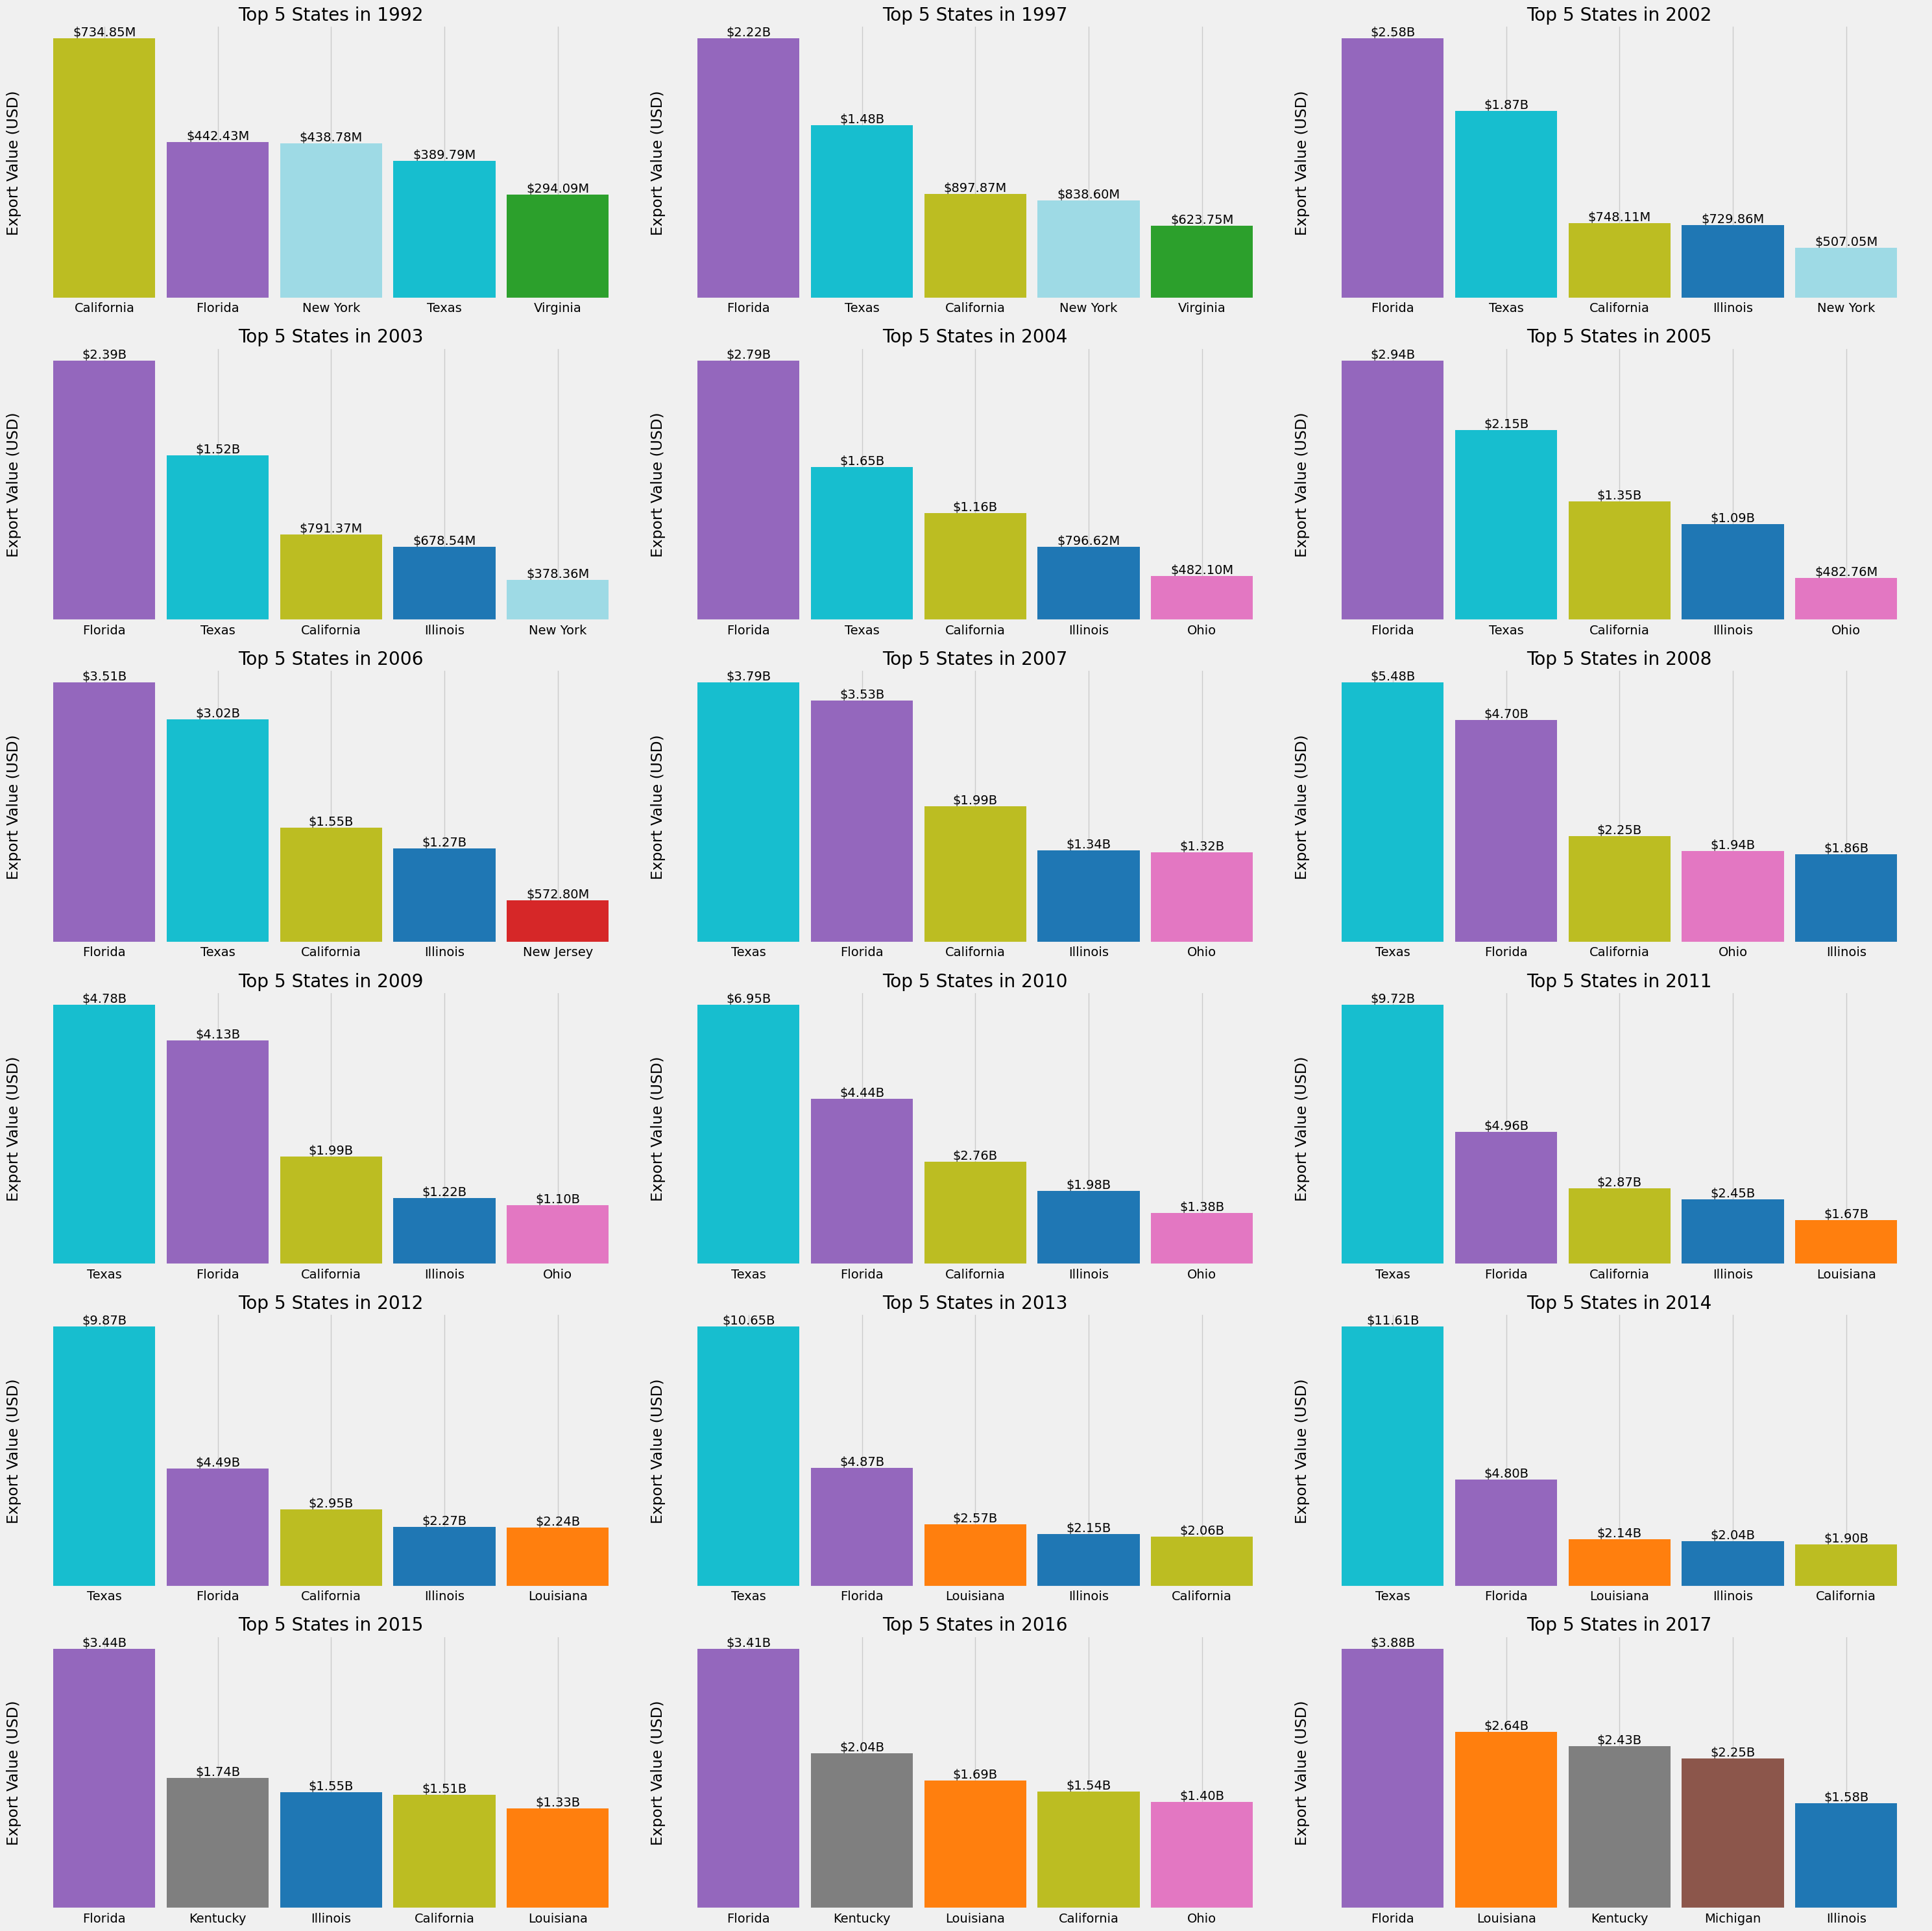

In [78]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 30))  
axes = axes.flatten()

for i, (year, row) in enumerate(exports.iterrows()):
    top5 = row.nlargest(5)
        
    # relacionar os estados com suas cores
    colors = [state_colors[state] for state in top5.index]

    ax = axes[i]
    top5.plot(kind='bar', color=colors, ax=ax, width=0.9)
    
    # adicionar rótulos de valor
    ax.bar_label(ax.containers[0], labels=[format_monetary(v) for v in top5])
    
    ax.set_yticks([])

    ax.set_title(f"Top 5 States in {year}")
    ax.set_ylabel("Export Value (USD)")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.show()

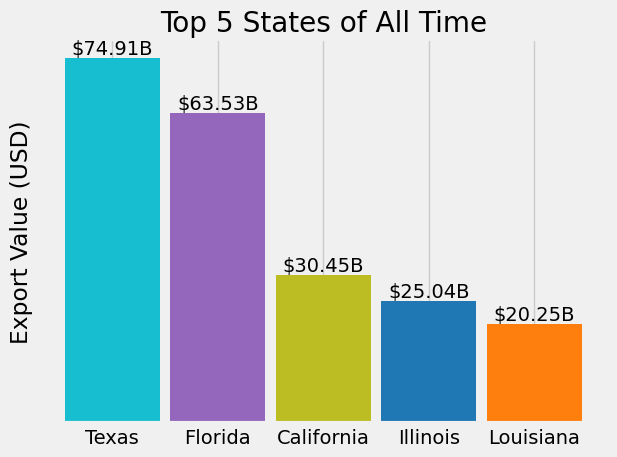

In [79]:
total_exports = exports.sum()

# top 5 de todos os tempos
top5_all_time = total_exports.nlargest(5)

colors = [state_colors[state] for state in top5_all_time.index]

ax = top5_all_time.plot(kind='bar', color=colors, width=0.9)
    
ax.bar_label(ax.containers[0], labels=[format_monetary(v) for v in top5_all_time])
    
ax.set_yticks([])

ax.set_title(f"Top 5 States of All Time")
ax.set_ylabel("Export Value (USD)")

ax.tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.show()


